In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from utilsfunction  import *
from sklearn.preprocessing import StandardScaler

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [61]:
data = np.loadtxt('Wave.txt')
features = data[:, :-1]
label = data[:, -1]

#normalize the data
features_norm = StandardScaler().fit_transform(features)

X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(features_norm, label, test_size=0.5, random_state=42, stratify=label)


In [62]:
y_train_norm_copy = y_train_norm.copy()
y_train_lab = etiquetage(y_train_norm_copy, 0.80)
score_norm = pertinence(X_train_norm, y_train_lab)
print(score_norm)


[2.18035992e-10 1.40891975e-07 5.89879365e-07 8.67577928e-07
 1.49896246e-06 1.70065600e-06 1.75616686e-06 1.65776428e-06
 1.33871276e-06 1.28307978e-06 1.29296253e-06 1.18532902e-06
 1.42439513e-06 1.45546117e-06 1.74571665e-06 1.67209654e-06
 1.44807663e-06 9.91203541e-07 5.21535736e-07 1.83363141e-07
 3.28978014e-09 1.75682447e-09 7.85574197e-09 1.04803372e-09
 5.33843426e-09 4.77114788e-09 4.53281417e-09 2.66911511e-09
 4.68981318e-09 1.76764065e-11 7.72571879e-10 4.37760199e-10
 3.40968535e-09 1.30696825e-08 1.63893296e-09 3.87205530e-09
 2.49543459e-09 5.31700530e-09 5.10133153e-09 3.50822116e-09]


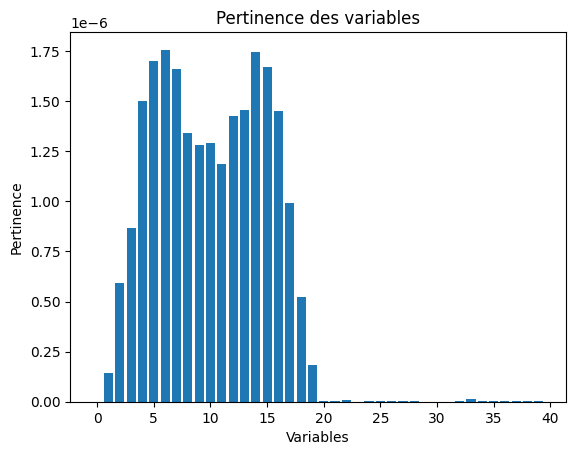

In [63]:
# plot des 40 variable trié des - au + pertinente
plt.bar(range(len(score_norm)), score_norm)
plt.xlabel('Variables')
plt.ylabel('Pertinence')
plt.title('Pertinence des variables')
plt.show()

## Courbe d'efficacité

In [64]:
acc_list = []

In [65]:
n_features, acc = plot_efficacite_courbe(X_train_norm, X_test_norm, y_train_norm, y_test_norm, score_norm, pert=0)
acc_list.append(acc)

## Sur les données non normalisées

In [66]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.5, random_state=42, stratify=label)
y_train_copy = y_train.copy()
y_train_lab_pas_norm = etiquetage(y_train_copy, 0.8)
score = pertinence(X_train, y_train_lab_pas_norm)

In [67]:
n_features, acc = plot_efficacite_courbe(X_train, X_test, y_train, y_test, score, pert=0)
acc_list.append(acc)

## Variable non pertinentes

In [68]:
n_features, acc = plot_efficacite_courbe(X_train_norm, X_test_norm, y_train_norm, y_test_norm, score_norm, pert=1)
acc_list.append(acc)

## Sans selection de variable

In [69]:
n_features, acc = plot_efficacite_courbe(X_train_norm, X_test_norm, y_train_norm, y_test_norm, score_norm, pert=2)
acc_list.append(acc)

In [72]:
n_features_list = [n_features, n_features, n_features, n_features]

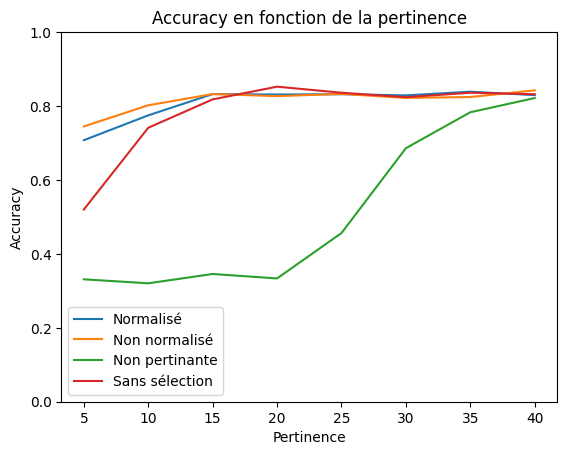

In [77]:
#plot des accuracy
plt.figure()
for i in range(4):
    plt.plot(n_features_list[i], acc_list[i])
plt.xlabel('Pertinence')
plt.ylabel('Accuracy')
plt.title('Accuracy en fonction de la pertinence')
plt.legend(['Normalisé', 'Non normalisé', 'Non pertinante', 'Sans sélection'])
plt.ylim(0, 1)
plt.show()

[0.8364, 0.8364, 0.8356, 0.8356, 0.8356, 0.8456, 0.834, 0.8404, 0.8432]


c:\Users\runhi\Desktop\TAA_TP3\utilsfunction.py:141: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  


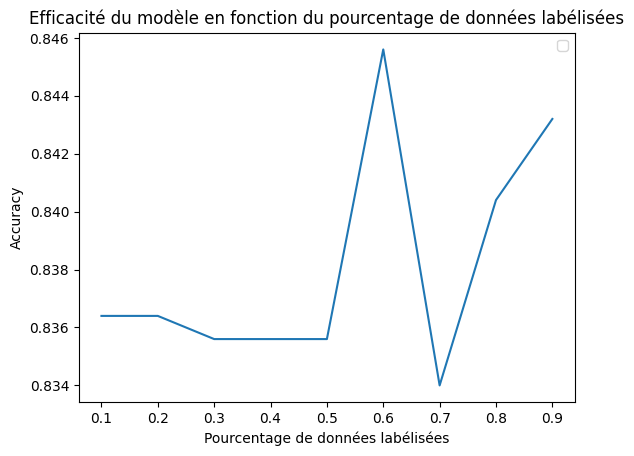

In [59]:
plot_efficacite_courbe_2( [0.1, 0.2,0.3, 0.4, 0.5, 0.6, 0.7,0.8,0.9], step=20)